<a href="https://colab.research.google.com/github/Kiksecret/Basic_Tensorflow/blob/main/TensorFlow_for_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic TensorFlow for Image Processing


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
np.unique(training_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

0
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  17  12  13  70 

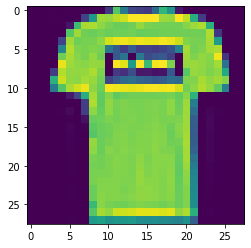

In [ ]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[1])
print(training_labels[1])
print(training_images[1])

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                     
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

โดยที่
**Sequential**: ใช้กำหนดชั้น (Layer) แบบ SEQUENCE ใน ANN

**Flatten**: หมายถึงการนำข้อมูล 2D ของรูปภาพมาทำเรียงต่อกันให้เป็น 1D

**Dense**: ใน Deep Learning เราสามารถเพิ่มชั้นได้เรื่อยๆ โดยกำหนดให้มีจำนวนนิวรอน (Neuron) ได้ตามต้องการ เช่น 128 และ 10 เป็นต้น โปรดสังเกต ในกรณีนี้ ชั้นสุดท้ายมีจำนวนนิวรอนเป็น 10 ตามจำนวนกลุ่มของเอาท์พุตที่ต้องการ 0 - 9

แต่ละชั้นจำเป็นต้องใช้ **activation function** เช่น

**Relu** หมายถึง "If X>0 return X, else return 0" ให้ผลลัพธ์เป็น X หาก X มีค่าเป็นบวก หรือไม่ให้ค่าเป็น 0 หาก X เท่ากับหรือน้อยกว่า 0

**Softmax** เป็นการหาค่าสูงสุดในลิสต์ เช่น หากอินพุตของชั้นนี้เป็น [0.1, 0.1, 0.05, 0.1, 0.95, 0.1, 0.05, 0.05, 0.05] ฟังก์ชันนี้จะให้ค่าเอาท์พุตเป็น [0,0,0,0,1,0,0,0,0] ทำให้สามารถระบุว่า การคัดแยกกลุ่ม (Classification) ของภาพอยู่ในกลุ่มใด


In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4940 - accuracy: 0.8262
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3680 - accuracy: 0.8666
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3330 - accuracy: 0.8778
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3108 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2916 - accuracy: 0.8915


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3595 - accuracy: 0.8762


[0.359540194272995, 0.8762000203132629]

In [ ]:
classifications = model.predict(test_images)

print(classifications[0])

[1.5122413e-05 6.5254660e-08 6.6215085e-07 4.4252914e-08 3.0005381e-07 1.6324235e-02 5.0615931e-06 1.6579565e-02 2.8281111e-06 9.6707201e-01]


In [ ]:
print(test_labels[0])

9


[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.    

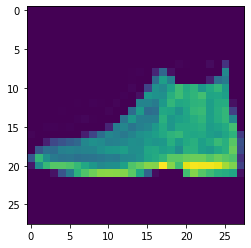

In [ ]:
np.set_printoptions(linewidth=200)
plt.imshow(test_images[0])
print(test_images[0])

[3.7185466e-10 3.7591181e-07 2.4194881e-06 1.1909655e-04 2.3746821e-03 3.3508570e-07 1.5990577e-11 2.2684713e-05 1.9980956e-08 9.9748045e-01]
9
[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.      

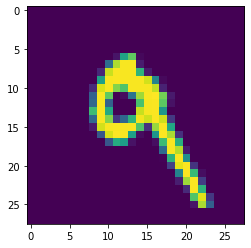

In [ ]:
print(classifications[7])
print(test_labels[7])

np.set_printoptions(linewidth=200)
plt.imshow(test_images[7])
print(test_images[7])

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                     
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.7.0
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2018 - accuracy: 0.9405
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0806 - accuracy: 0.9754
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0519 - accuracy: 0.9841
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0367 - accuracy: 0.9881
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0788 - accuracy: 0.9760
[2.7509997e-09 1.7764544e-08 1.5149682e-07 3.8235474e-05 2.4364023e-11 3.8879837e-09 3.6775821e-12 9.9996030e-01 2.6431672e-07 1.0622342e-06]
7


In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                     
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.7.0
Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1853 - accuracy: 0.9444
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0743 - accuracy: 0.9765
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0490 - accuracy: 0.9847
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0342 - accuracy: 0.9888
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0713 - accuracy: 0.9798
[1.3251903e-09 1.7413694e-08 1.2349695e-07 9.3349927e-06 3.4094331e-13 1.0198253e-09 3.3673846e-14 9.9999022e-01 1.8798325e-09 3.0758460e-07]
7


In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                     
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])



model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.7.0
11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5


ValueError: ignored

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])



model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.7.0
Epoch 1/5


InvalidArgumentError: ignored

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.leaky_relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.7.0
Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1850 - accuracy: 0.9435
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0790 - accuracy: 0.9752
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0573 - accuracy: 0.9822
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0439 - accuracy: 0.9864
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0673 - accuracy: 0.9819
[8.1669990e-11 3.3289897e-08 1.4403008e-09 5.8459193e-10 4.5699755e-12
 1.0329322e-12 1.0744898e-15 9.9999988e-01 1.1508107e-11 1.6459283e-07]
7


### คำตอบ
เมื่อทำการเพิ่มชั้นใหม่ที่มี 256 นิวรอน ทำให้ได้เวลาที่ใช้เพิ่มขึ้นเล็กน้อย แต่ได้ค่า Loss และค่า Accuracy ดีขึ้น  ซึ่งการเพิ่มนิวรอนทำให้ค่า loss ลดลงนั่นเอง


## Exercise 6: 

ทดลองการเทรนโมเดลโดยไม่ทำการ Normalization สังเกตผลลัพธ์ที่ได้


In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# ยกเลิกการ Normalization ได้อย่างไร
#training_images=training_images/255.0
#test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.7.0
Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 2.5791 - accuracy: 0.9075
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3306 - accuracy: 0.9364
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2870 - accuracy: 0.9417
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2715 - accuracy: 0.9440
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3007 - accuracy: 0.9409
[1.5461132e-32 1.0468963e-11 3.5511551e-15 2.2880695e-09 3.5790599e-16
 1.3901259e-13 1.3808530e-28 1.0000000e+00 9.1427090e-20 7.0758364e-12]
7


In [ ]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nLoss < 40% so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


2.7.0
Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4725 - accuracy: 0.8315
Epoch 2/5
1867/1875 [============================>.] - ETA: 0s - loss: 0.3594 - accuracy: 0.8689
Loss < 40% so cancelling training!
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3595 - accuracy: 0.8688


In [ ]:

import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85):
      print("\nAccuracy > 85% so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])



2.7.0
4431872/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4758 - accuracy: 0.8307
Epoch 2/5
1873/1875 [============================>.] - ETA: 0s - loss: 0.3580 - accuracy: 0.8686
Accuracy > 85% so cancelling training!
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3580 - accuracy: 0.8686
